In [1]:
from mypackage import cleaning_functions as cf
from mypackage import scraping_functions as sf
from mypackage import predict_functions as pf
from mypackage import loading_functions as lf
import seaborn as sns
import matplotlib.pyplot as plt

Loading in the preset data to use as a training set...

In [3]:
games = lf.load_data('games')
plays = lf.load_data('plays')

Scraping a test game.  This is a week 14 game from the 2023 NFL Season.  Houston Texans at New York Jets - 12/10/2023

In [19]:
test_data = sf.scrape_game_data('https://www.pro-football-reference.com/boxscores/202312100nyj.htm')
test_data.dropna(subset=['Down'])
test_data = test_data[test_data['Down'] != '']

Jets vs. Texans 
 total plays: 125


Experimenting with the predict functionality.  Again, this is still a work in progress and will be revisited in future updates

In [5]:
accuracy, final_data = pf.predict_wins(test_data, plays)

accuracy: 0.7459016393442623


Scraped play by play data can be useful for creating plots like these to visualize what happens on certain downs during a game

Text(0.5, 1.0, 'Total yardage by Down')

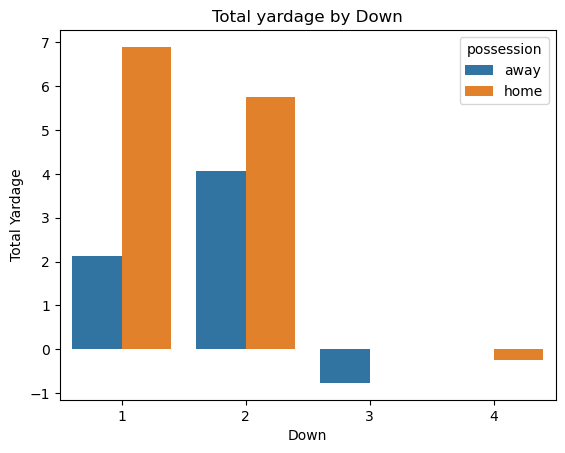

In [23]:
avg_yardage = test_data.groupby(['possession', 'Down'])['Yardage'].mean().reset_index()
sns.barplot(x='Down', y='Yardage', hue='possession', data=avg_yardage)
plt.xlabel('Down')
plt.ylabel('Average Yardage')
plt.title('Average Yardage by Down')